In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set_style('darkgrid')

In [2]:
act_df = pd.read_csv('ANLSYS2/single_cell/single_ACTcheck.csv')
prfdr_df = pd.read_csv('ANLSYS2/single_cell/single_PRFDR.csv')

# add std info to csv : 
act_std = pd.read_csv('ANLSYS2/single_cell/single_ACTcheck_std.csv')
prfdr_std = pd.read_csv('ANLSYS2/single_cell/single_PRFDR_std.csv')

act_df['speed_std'] = act_std.speed
prfdr_df['speed_std'] = prfdr_std.speed

act_df['persist_std'] = act_std.persistance
prfdr_df['persist_std'] = prfdr_std.persistance

print(act_df.columns)
print(prfdr_df.columns)

Index(['Unnamed: 0', 'Lambda', 'Max_act', 'speed', 'persistance', 'sum_order',
       'global_order', 'lcl_order', 'speed_std', 'persist_std'],
      dtype='object')
Index(['Unnamed: 0', 'Lambda', 'Max_act', 'speed', 'persistance', 'sum_order',
       'global_order', 'lcl_order', 'speed_std', 'persist_std'],
      dtype='object')


In [37]:
print(sorted(act_df.Lambda.unique()))
print(sorted(act_df.Max_act.unique()))
print(sorted(prfdr_df.Lambda.unique()))
print(sorted(prfdr_df.Max_act.unique()))

[50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000, 10000, 20000]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
[50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2500, 5000, 10000, 20000]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


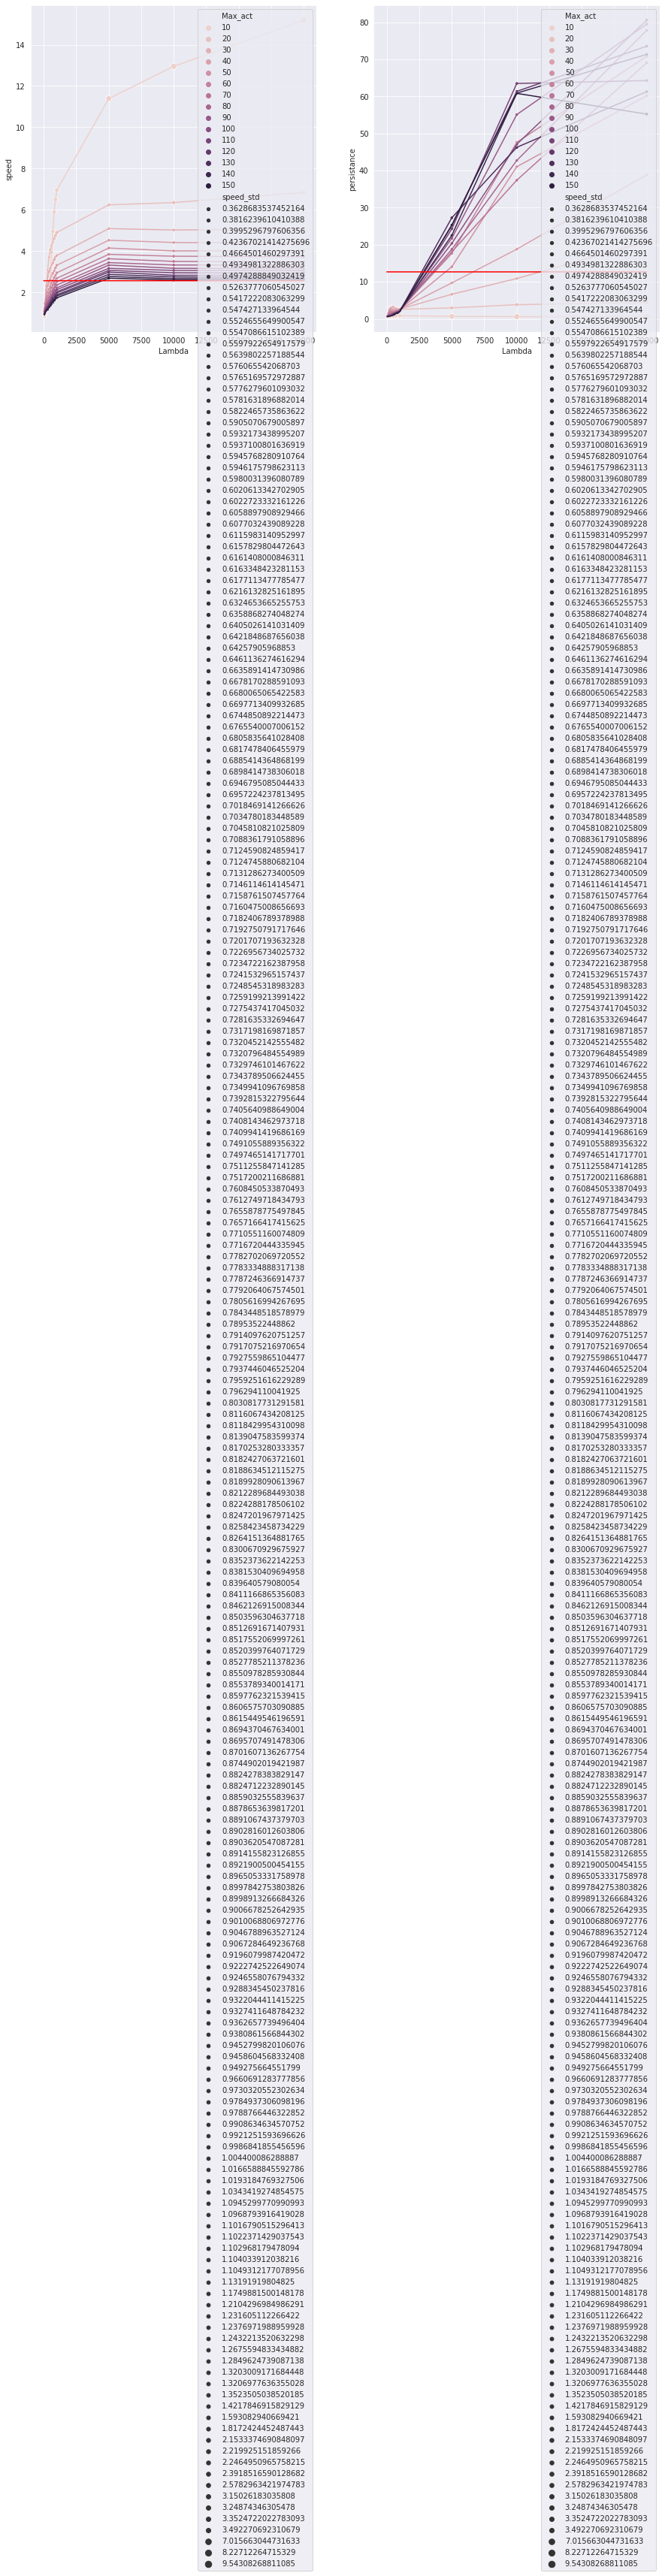

In [10]:
# ACT
# lambda vs speed,persist

f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = act_df, ax = ax1,legend = 'full')
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = act_df, ax = ax2, legend = 'full')
sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = act_df, ax = ax1,legend = False)
sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = act_df, ax = ax2, legend = False)
ax1.plot(range(0,20000),[2.57] * 20000,c = 'r')
ax2.plot(range(0,20000),[12.68] * 20000,c = 'r')
plt.show()

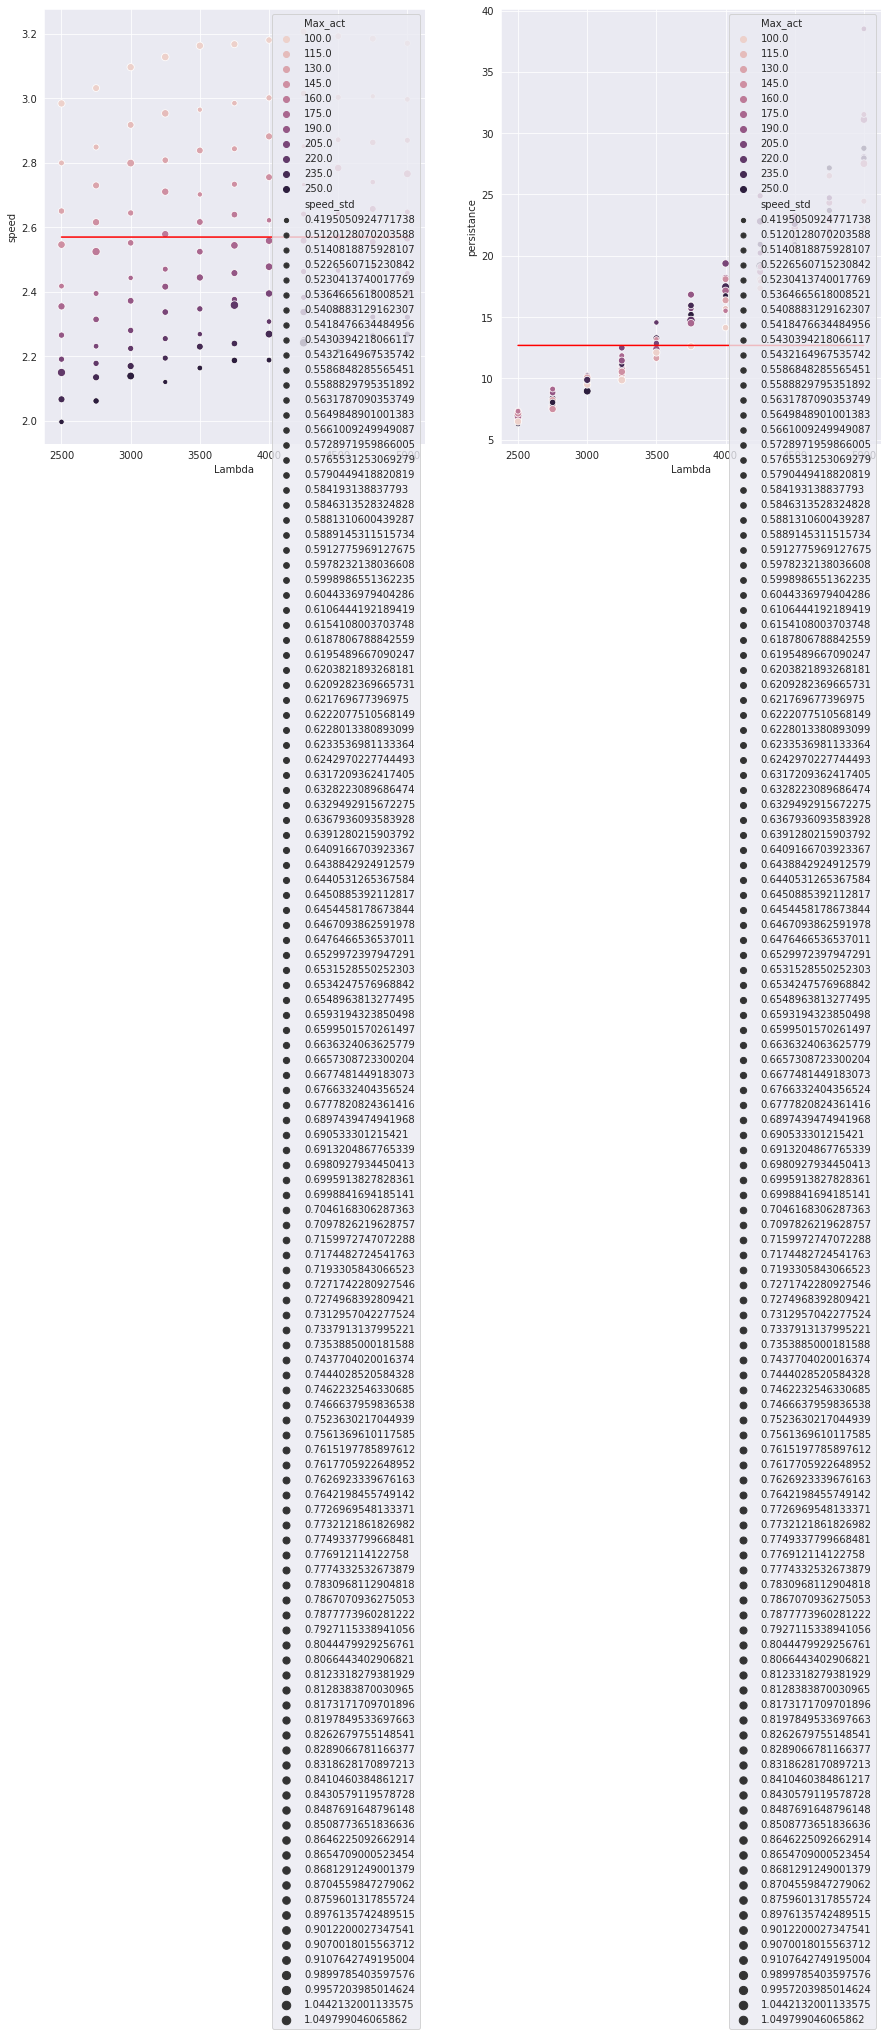

In [11]:
# Zooom ACT

ZOOM_act = pd.read_csv('ANLSYS2/single_cell/single_ACTZOOM5.csv')

# add std info to csv : 
ZOOMact_std = pd.read_csv('ANLSYS2/single_cell/single_ACTZOOM5_std.csv')

ZOOM_act['speed_std'] = ZOOMact_std.speed
ZOOM_act['persist_std'] = ZOOMact_std.persistance

# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = ZOOM_act, ax = ax1,legend = 'full')
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = ZOOM_act, ax = ax2, legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(2500,5000),[2.57] * 2500,c = 'r')
ax2.plot(range(2500,5000),[12.68] * 2500,c = 'r')
plt.show()

In [38]:
print(sorted(ZOOM_act.Lambda.unique()))
print(sorted(ZOOM_act.Max_act.unique()))

[2500.0, 2750.0, 3000.0, 3250.0, 3500.0, 3750.0, 4000.0, 4250.0, 4500.0, 4750.0, 5000.0]
[100.0, 115.0, 130.0, 145.0, 160.0, 175.0, 190.0, 205.0, 220.0, 235.0, 250.0]


In [12]:
# filter df on values near real cells : 
filter_df = ZOOM_act[2.5 < ZOOM_act.speed]
filter_df = ZOOM_act[ZOOM_act.speed < 2.6]
filter_df = ZOOM_act[12.5 < ZOOM_act.persistance]
filter_df = ZOOM_act[ZOOM_act.persistance < 12.8]
print(filter_df.Lambda.unique(),filter_df.Max_act.unique())

import plotly.express as px


fig = px.density_heatmap(filter_df, x="Lambda", y="Max_act", marginal_x="histogram", marginal_y="histogram",nbinsx = 10)
fig.show()#,nbinsx = 300,nbinsy = 8

[3000. 3500. 2500. 2750. 3250. 3750.] [175. 130. 190. 235. 115. 160. 205. 250. 100. 145. 220.]


Index(['Unnamed: 0', 'Lambda', 'Max_act', 'speed', 'persistance', 'sum_order',
       'global_order', 'lcl_order', 'speed_std', 'persist_std', 'upper_speed',
       'lower_speed', 'upper_persist', 'lower_persist'],
      dtype='object')


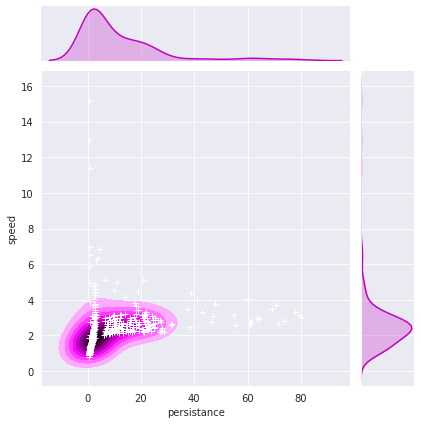

In [26]:
## CUMULATIVE ERROR PLOT : 
# merge zoom and non zoom : 
# Zooom ACT
ZOOM_act = pd.read_csv('ANLSYS2/single_cell/single_ACTZOOM5.csv')
# add std info to csv : 
ZOOMact_std = pd.read_csv('ANLSYS2/single_cell/single_ACTZOOM5_std.csv')
ZOOM_act['speed_std'] = ZOOMact_std.speed
ZOOM_act['persist_std'] = ZOOMact_std.persistance

# General act : 
act_df = pd.read_csv('ANLSYS2/single_cell/single_ACTcheck.csv')
act_std = pd.read_csv('ANLSYS2/single_cell/single_ACTcheck_std.csv')
act_df['speed_std'] = act_std.speed
act_df['persist_std'] = act_std.persistance


#merged = act_df.merge(ZOOM_act,left_index = 'Lambda',right_on = 'Max_act')
merged = pd.concat([ZOOM_act,act_df])
merged['upper_speed'] = merged.speed + merged.speed_std
merged['lower_speed'] = merged.speed - merged.speed_std
merged['upper_persist'] = merged.persistance + merged.persist_std
merged['lower_persist'] = merged.persistance - merged.persist_std
print(merged.columns)
# f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
# sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = merged, ax = ax1,legend = 'brief')
# sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = merged, ax = ax2, legend = 'brief')
# sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = merged, ax = ax1,legend = False)
# sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = merged, ax = ax2, legend = False)
# ax1.plot(range(0,20000),[2.57] * 20000,c = 'r')
# ax2.plot(range(0,20000),[12.68] * 20000,c = 'r')
# plt.show()
#print(merged.count())

def cumul_err(x):
    # unpack : 
    speed = x[0]
    uspeed = x[1]
    lspeed = x[2]
    pers = x[3]
    upers = x[4]
    lpers = x[5]
    
    s_ = 2.571710
    p_ = 12.689906
    
    cum_err = abs(s_ - speed) + abs(s_ - uspeed) + abs(s_ - lspeed) + abs(p_ - pers) + abs(p_ - upers) + abs(p_ - lpers)
    return cum_err

merged['Error'] = merged[['speed','upper_speed','lower_speed','persistance','upper_persist','lower_persist']].apply(cumul_err,axis = 1)
g = sns.jointplot(x="persistance", y="speed", data=merged, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)

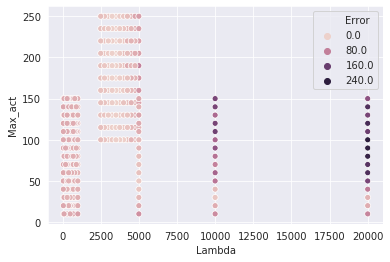

In [27]:
# transform data to matrix
## rows = speed values
## collumns = persist  values 
## collor = error

# try scatter plot : 
sns.scatterplot(x = 'Lambda',y = 'Max_act', hue = 'Error',data = merged)

(24, 24)


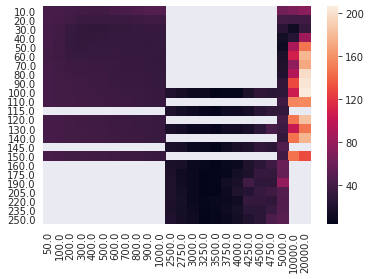

In [28]:
lambdas = sorted(merged.Lambda.unique())
acts = sorted(merged.Max_act.unique())

mtrx = np.zeros((len(acts),len(lambdas)))
x_ticks = []
y_ticks = []
print(mtrx.shape)
for j,x in enumerate(lambdas):
    for i,y in enumerate(acts):
        try:
            val = merged[(merged['Lambda'] == x) & (merged['Max_act'] == y)].Error.to_numpy()[0]
            mtrx[i,j] = val
            x_ticks.append(x)
            y_ticks.append(y)
        except:
            mtrx[i,j] = np.nan
            x_ticks.append(x)
            y_ticks.append(y)
#print(mtrx)       
#foo = df[(df['column1']==value) | (df['columns2'] == 'b') | (df['column3'] == 'c')]
sns.heatmap(mtrx,xticklabels = lambdas,yticklabels = acts)


In [29]:
# find minumum :
min_err = min(merged.Error)
opt_params = merged[merged.Error == min_err]#[['Lambda','Max_act','Error']]
print(opt_params)

    Unnamed: 0  Lambda  Max_act     speed  persistance   sum_order  \
14          14  3500.0    160.0  2.616727    12.581741  212.166024   

    global_order  lcl_order  speed_std  persist_std  upper_speed  lower_speed  \
14      7.746748   4.036269   0.735389     1.226059     3.352115     1.881338   

    upper_persist  lower_persist     Error  
14        13.8078      11.355682  4.076077  


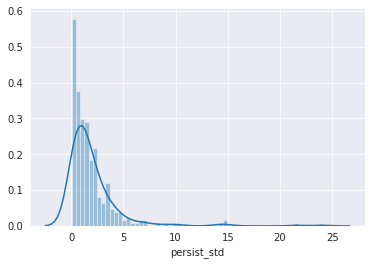

In [33]:
sns.distplot(merged['persist_std'].dropna(),bins = 60)

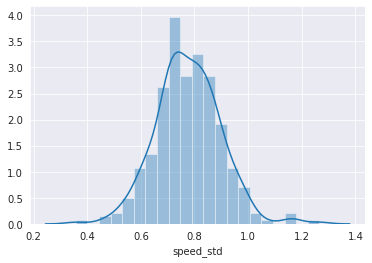

In [28]:
sns.distplot(merged['speed_std'].dropna())

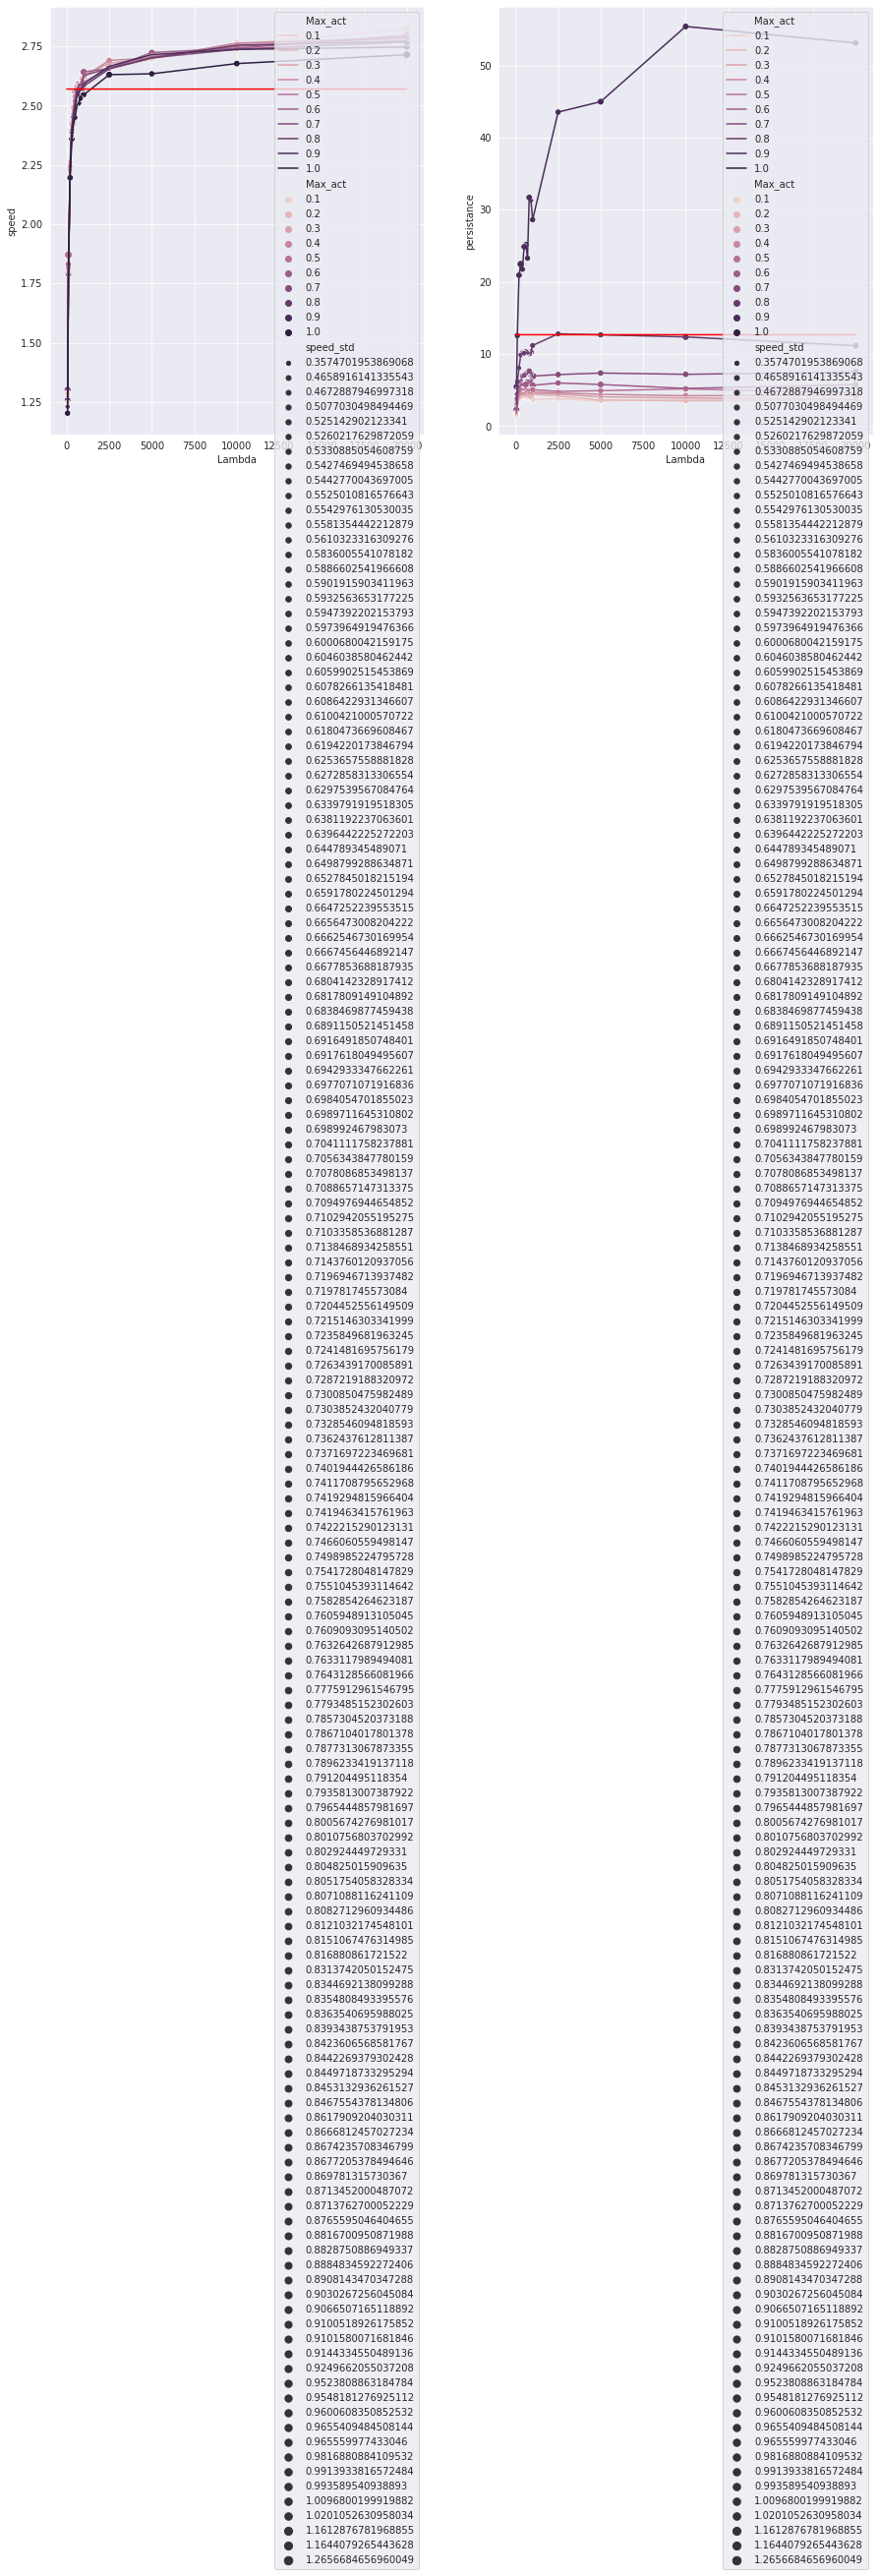

In [15]:
# PRFDR
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = prfdr_df, ax = ax1,legend = 'full')
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = prfdr_df, ax = ax2, legend = 'full')
sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = prfdr_df, ax = ax1,legend = 'full')
sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = prfdr_df, ax = ax2, legend = 'full')
ax1.plot(range(0,20000),[2.57] * 20000,c = 'r')
ax2.plot(range(0,20000),[12.68] * 20000,c = 'r')
plt.show()

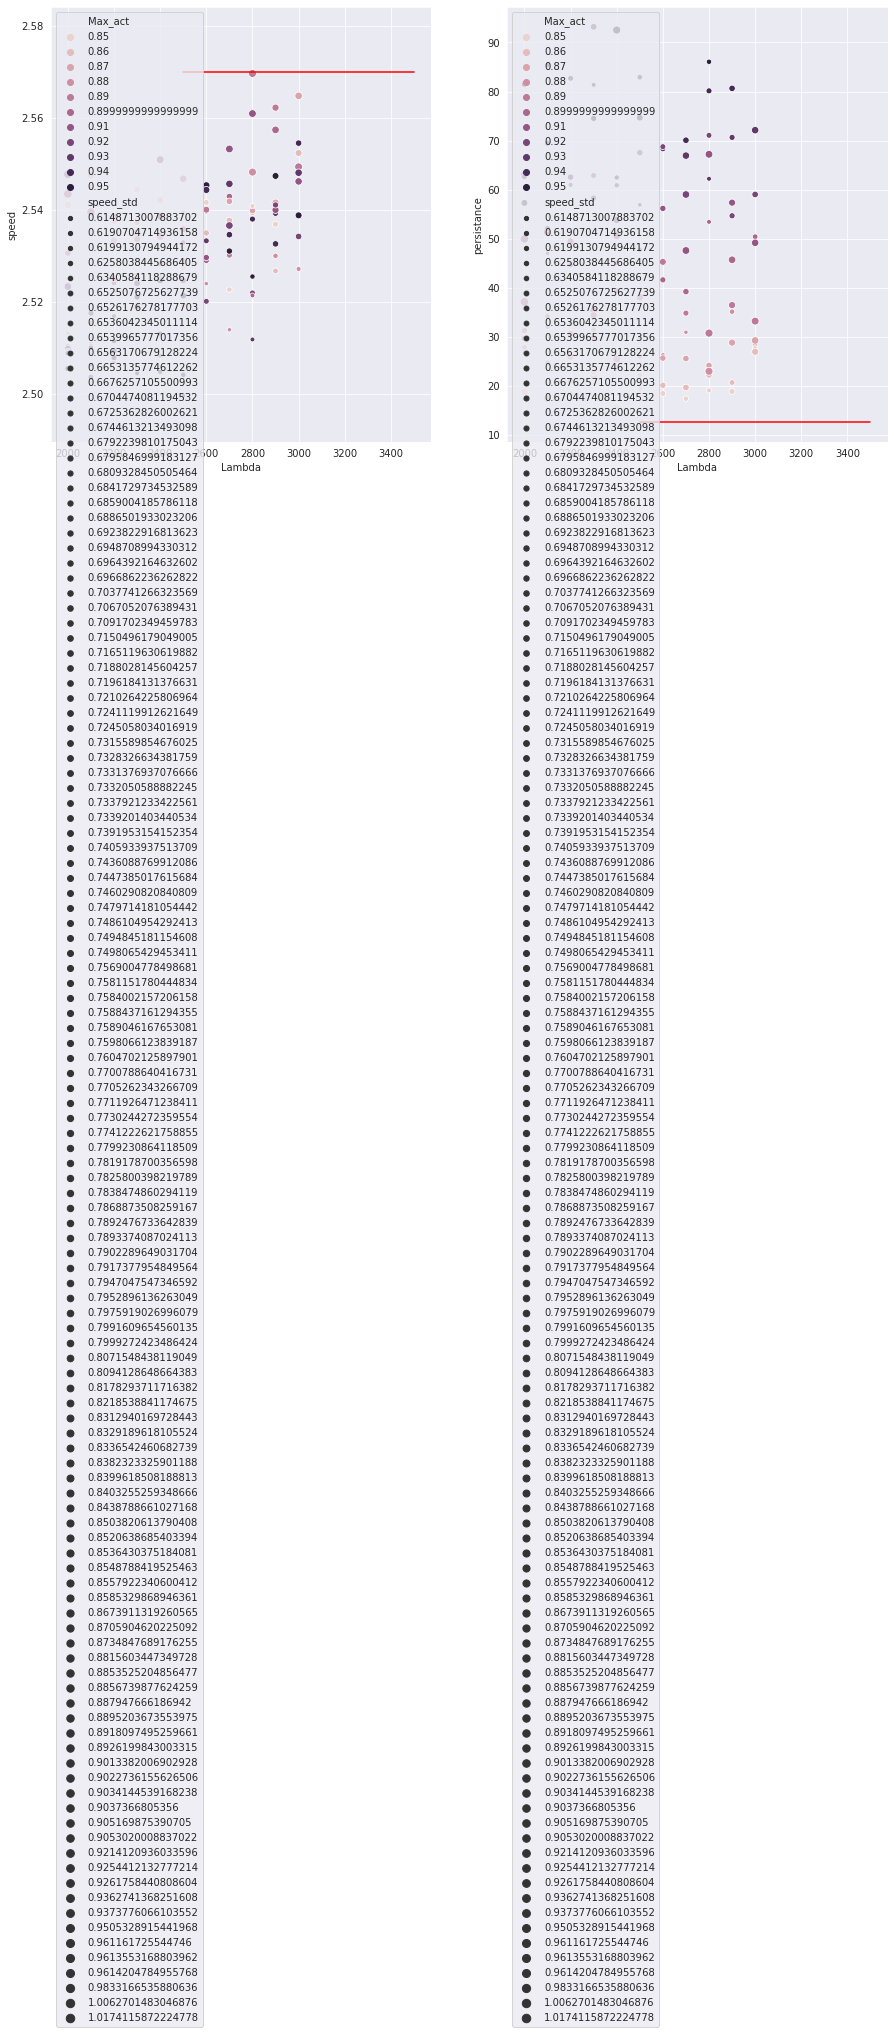

In [16]:
# ZOOM1 PRFDR : 
ZOOM_prfdr = pd.read_csv('ANLSYS2/single_cell/singleZOOM_PRFDR.csv')

# add std info to csv : 
ZOOMprfdr_std = pd.read_csv('ANLSYS2/single_cell/singleZOOM_PRFDR_std.csv')

ZOOM_prfdr['speed_std'] = ZOOMprfdr_std.speed
ZOOM_prfdr['persist_std'] = ZOOMprfdr_std.persistance

# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = ZOOM_prfdr, ax = ax1,legend = 'full')
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = ZOOM_prfdr, ax = ax2, legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(2500,3500),[2.57] * 1000,c = 'r')
ax2.plot(range(2500,3500),[12.68] * 1000,c = 'r')
plt.show()

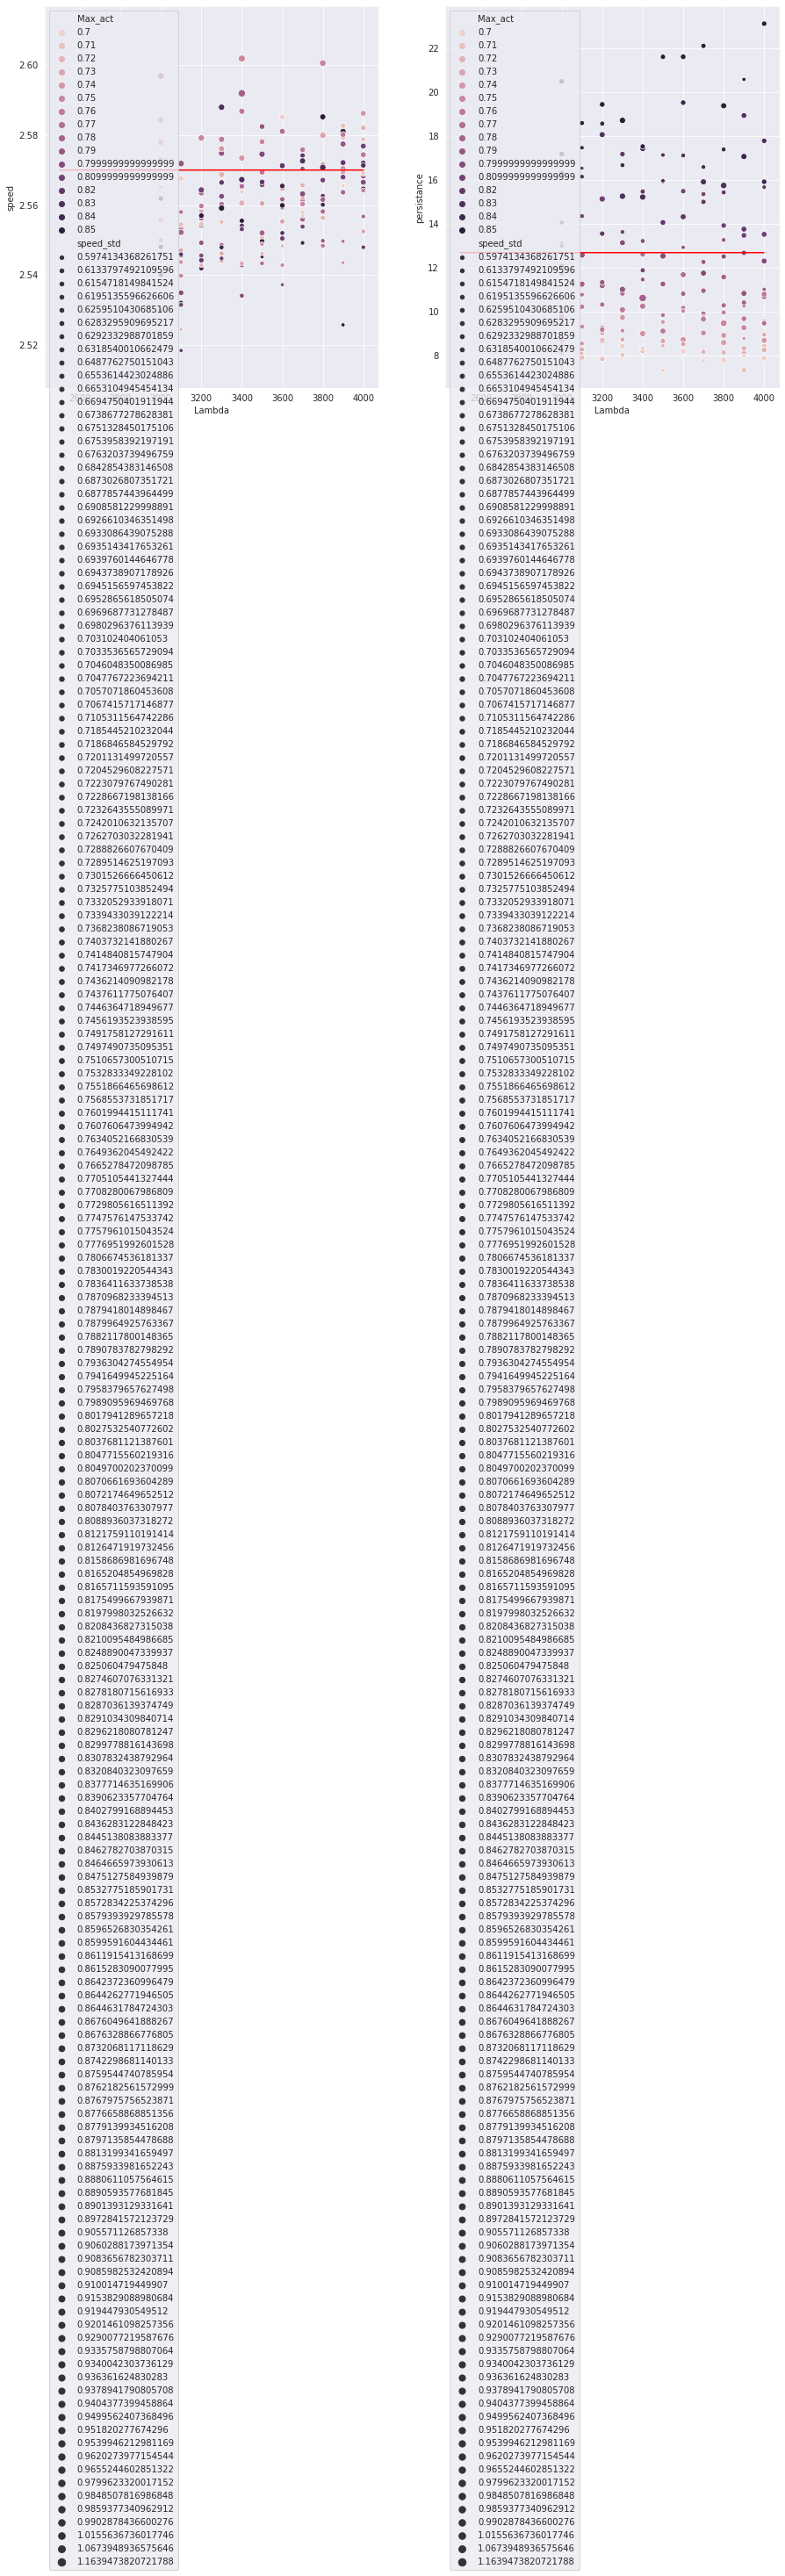

In [17]:
# ZOOM1 PRFDR : 
ZOOM_prfdr = pd.read_csv('ANLSYS2/single_cell/singleZOOM4_PRFDR.csv')

# add std info to csv : 
ZOOMprfdr_std = pd.read_csv('ANLSYS2/single_cell/singleZOOM4_PRFDR_std.csv')

ZOOM_prfdr['speed_std'] = ZOOMprfdr_std.speed
ZOOM_prfdr['persist_std'] = ZOOMprfdr_std.persistance

# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = ZOOM_prfdr, ax = ax1,legend = 'full')
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = ZOOM_prfdr, ax = ax2, legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(2500,4000),[2.57] * 1500,c = 'r')
ax2.plot(range(2500,4000),[12.68] * 1500,c = 'r')
plt.show()

In [18]:
# ZOOM1 PRFDR : 
ZOOM_prfdr = pd.read_csv('ANLSYS2/single_cell/singleZOOM4_PRFDR.csv')

# add std info to csv : 
ZOOMprfdr_std = pd.read_csv('ANLSYS2/single_cell/singleZOOM4_PRFDR_std.csv')

ZOOM_prfdr['speed_std'] = ZOOMprfdr_std.speed
ZOOM_prfdr['persist_std'] = ZOOMprfdr_std.persistance

# Plot
# lambda vs speed,persist
#f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
# fig = px.scatter(ZOOM_prfdr,x = 'Lambda',y = 'speed', color = 'Max_act',size = 'speed_std')
# fig.show()
#fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
# fig = px.scatter(ZOOM_prfdr,x = 'Lambda',y = 'persistance',color = 'Max_act',size = 'speed_std')
# fig.show()
#     go.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = ZOOM_prfdr, ax = ax2, legend = 'full')
# #sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
# #sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
# ax1.plot(range(2500,4000),[2.57] * 1500,c = 'r')
# ax2.plot(range(2500,4000),[12.68] * 1500,c = 'r')
# plt.show()
# filter df on values near real cells : 
# filter_df = act_df[2.5 < act_df.speed]
# filter_df = act_df[act_df.speed < 2.6]
filter_df = ZOOM_prfdr[12.5 < ZOOM_prfdr.persistance]
filter_df = ZOOM_prfdr[ZOOM_prfdr.persistance < 12.8]
print(filter_df.Lambda.unique(),filter_df.Max_act.unique())


fig = px.density_heatmap(filter_df, x="Lambda", y="Max_act", marginal_x="histogram", marginal_y="histogram")
fig.show()#,nbinsx = 300,nbinsy = 8
# fig = make_subplots(rows=1, cols=2)
# fig.add_trace(
#     px.scatter(ZOOM_prfdr,x = 'Lambda',y = 'speed', color = 'Max_act',size = 'speed_std'),
#     row = 1,col = 1
# )

# fig.add_trace(
#     px.scatter(ZOOM_prfdr,x = 'Lambda',y = 'persistance',color = 'Max_act',size = 'speed_std'),
#     row = 1, col = 2
# )

[3800. 3700. 3100. 3500. 3600. 3200. 3300. 3900. 3000. 4000. 3400.] [0.8  0.77 0.75 0.76 0.78 0.71 0.74 0.72 0.73 0.79 0.7  0.81]


Index(['Unnamed: 0', 'Lambda', 'Max_act', 'speed', 'persistance', 'sum_order',
       'global_order', 'lcl_order', 'speed_std', 'persist_std', 'upper_speed',
       'lower_speed', 'upper_persist', 'lower_persist'],
      dtype='object')


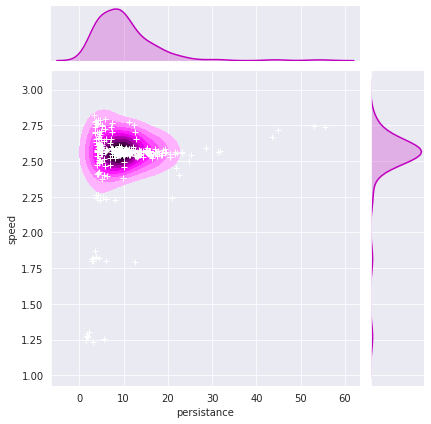

In [30]:
## CUMULATIVE ERROR PLOT : 
# merge zoom and non zoom : 
# ZOOM1 PRFDR : 
ZOOM_prfdr = pd.read_csv('ANLSYS2/single_cell/singleZOOM4_PRFDR.csv')

# add std info to csv : 
ZOOMprfdr_std = pd.read_csv('ANLSYS2/single_cell/singleZOOM4_PRFDR_std.csv')
ZOOM_prfdr['speed_std'] = ZOOMprfdr_std.speed
ZOOM_prfdr['persist_std'] = ZOOMprfdr_std.persistance

# General act : 
prfdr_df = pd.read_csv('ANLSYS2/single_cell/single_PRFDR.csv')
prfdr_std = pd.read_csv('ANLSYS2/single_cell/single_PRFDR_std.csv')
prfdr_df['speed_std'] = prfdr_std.speed
prfdr_df['persist_std'] = prfdr_std.persistance


#merged = act_df.merge(ZOOM_act,left_index = 'Lambda',right_on = 'Max_act')
merged = pd.concat([ZOOM_prfdr,prfdr_df])
# add std to persist and speed for error calc : 
merged['upper_speed'] = merged.speed + merged.speed_std
merged['lower_speed'] = merged.speed - merged.speed_std
merged['upper_persist'] = merged.persistance + merged.persist_std
merged['lower_persist'] = merged.persistance - merged.persist_std
print(merged.columns)
# f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
# sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = merged, ax = ax1,legend = 'brief')
# sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = merged, ax = ax2, legend = 'brief')
# sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = merged, ax = ax1,legend = False)
# sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = merged, ax = ax2, legend = False)
# ax1.plot(range(0,20000),[2.57] * 20000,c = 'r')
# ax2.plot(range(0,20000),[12.68] * 20000,c = 'r')
# plt.show()
#print(merged.count())

def cumul_err(x):
    # unpack : 
    speed = x[0]
    uspeed = x[1]
    lspeed = x[2]
    pers = x[3]
    upers = x[4]
    lpers = x[5]
    
    s_ = 2.571710
    p_ = 12.689906
    
    cum_err = abs(s_ - speed) + abs(s_ - uspeed) + abs(s_ - lspeed) + abs(p_ - pers) + abs(p_ - upers) + abs(p_ - lpers)
    return cum_err

merged['Error'] = merged[['speed','upper_speed','lower_speed','persistance','upper_persist','lower_persist']].apply(cumul_err,axis = 1)
g = sns.jointplot(x="persistance", y="speed", data=merged, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)

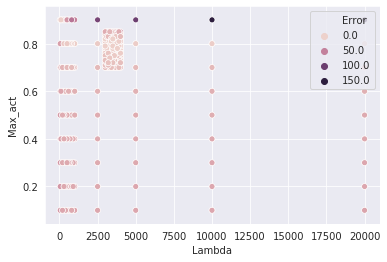

In [31]:

# try scatter plot : 
sns.scatterplot(x = 'Lambda',y = 'Max_act', hue = 'Error',data = merged)

(25, 26)


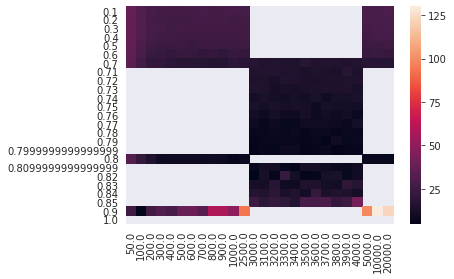

In [32]:
lambdas = sorted(merged.Lambda.unique())
acts = sorted(merged.Max_act.unique())

mtrx = np.zeros((len(acts),len(lambdas)))
print(mtrx.shape)
for j,x in enumerate(lambdas):
    for i,y in enumerate(acts):
        try:
            val = merged[(merged['Lambda'] == x) & (merged['Max_act'] == y)].Error.to_numpy()[0]
            mtrx[i,j] = val
        except:
            mtrx[i,j] = np.nan
#print(mtrx)       
#foo = df[(df['column1']==value) | (df['columns2'] == 'b') | (df['column3'] == 'c')]
sns.heatmap(mtrx,xticklabels = lambdas,yticklabels = acts)



In [33]:
# find minumum :
min_err = min(merged.Error)
opt_params = merged[merged.Error == min_err]#[['Lambda','Max_act','Error']]
print(opt_params)

     Unnamed: 0  Lambda  Max_act     speed  persistance   sum_order  \
161         161  3400.0     0.81  2.553104     11.87515  799.503753   

     global_order  lcl_order  speed_std  persist_std  upper_speed  \
161      7.807179   4.089368   0.753283     1.211049     3.306388   

     lower_speed  upper_persist  lower_persist     Error  
161     1.799821        13.0862      10.664101  4.762027  


In [ ]:
0.08/2.62

In [ ]:
2.62/0.08

In [ ]:
.0305 * 20


In [ ]:
np.linspace(.85,.95,11)

In [ ]:
np.linspace(2500,5000,11)

In [ ]:
np.linspace(100,250,11)

In [39]:
max_act = np.linspace(10,250,25)

In [40]:
max_act

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200., 210., 220.,
       230., 240., 250.])